In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [4]:
df1 = pd.read_csv('../db/heart_data.csv')
print("Shape DF1 : ", df1.shape)
df1 =  df1[df1.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df1['Diabetic'] = df1['Diabetic'].astype(int)
df1.head()
original_length = len(df1)

Shape DF1 :  (319795, 18)


Columns with values True/False need not to be cleaned. We will focus on remaining columns to check if any cleaning is required.
Following columns are True/False:
[HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer]

BMI Cleaning: we will consider cases between min-value and value less than 80
Mean of BMI:  28.325398520927465
Range of BMI: [ 12.02 , 94.85 ]
We will remove BMI values which are more than 80, as in real life they are above normal body range


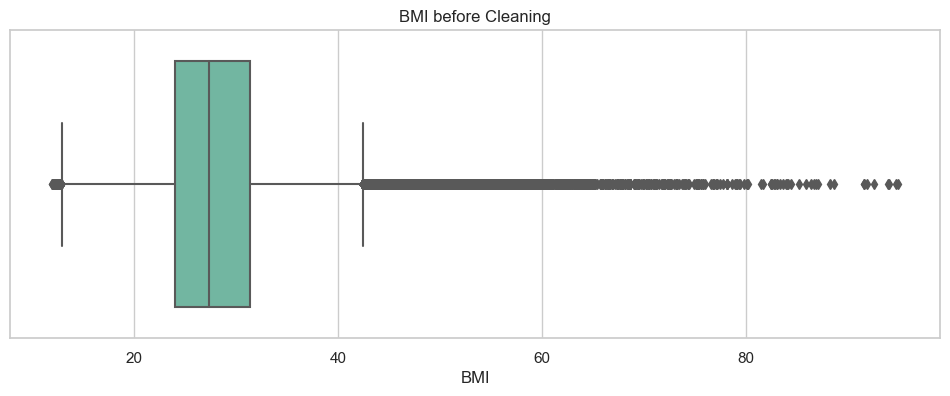

In [5]:
#bmi
print("BMI Cleaning: we will consider cases between min-value and value less than 80")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.boxplot(x=df1["BMI"], palette="Set2").set(title="BMI before Cleaning")

print("Mean of BMI: ", df1["BMI"].mean())
print("Range of BMI: [", df1["BMI"].min(), ",", df1["BMI"].max(), "]")
print("We will remove BMI values which are more than 80, as in real life they are above normal body range")

21.47   27.98
Some data that was above reasonable human capacity i.e. more than 80 was removed.


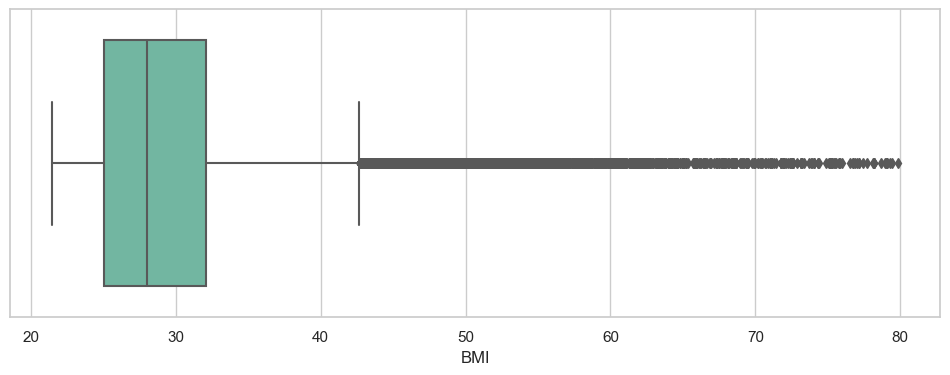

In [79]:
# Cleaning BMI
Q1 = df1["BMI"].quantile(0.10)
Q3 = df1["BMI"].quantile(0.55)
IQR = Q3 - Q1
print(Q1, " ", Q3)
# Identify outliers
outliers = df1[(df1["BMI"] < Q1 - 1.5 * IQR) | (df1["BMI"] > Q3 + 1.5 * IQR)]

lower_bound = Q1
upper_bound = 80

# Remove outliers based on the specified range
df1 = df1[(df1["BMI"] >= lower_bound) & (df1["BMI"] <= upper_bound)]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.boxplot(x=df1["BMI"], palette="Set2")
print("Some data that was above reasonable human capacity i.e. more than 80 was removed.")

PhysicalHealth Cleaning
Mean of PhysicalHealth:  3.3760837849103793
Range of PhysicalHealth: [ 0.0 , 30.0 ]
Data is reasonably distributed, no need to clean out.


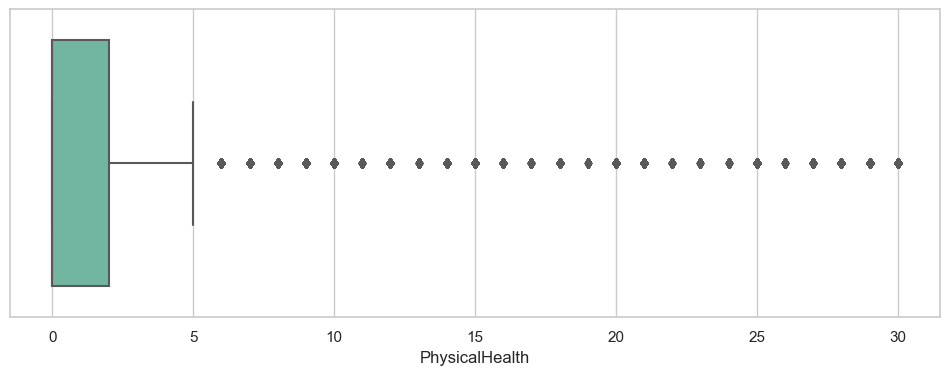

In [80]:
#Physical Health
print("PhysicalHealth Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.boxplot(x=df1["PhysicalHealth"], palette="Set2")

print("Mean of PhysicalHealth: ", df1["PhysicalHealth"].mean())
print("Range of PhysicalHealth: [", df1["PhysicalHealth"].min(), ",", df1["PhysicalHealth"].max(), "]")
print("Data is reasonably distributed, no need to clean out.")

MentalHealth Cleaning
Mean of MentalHealth:  3.825778101986939
Range of MentalHealth: [ 0.0 , 30.0 ]
Data is reasonably distributed, no need to clean out.


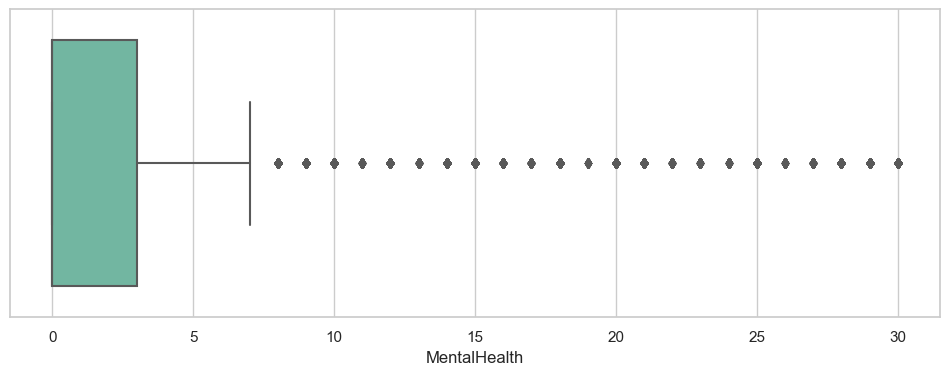

In [81]:
#Mental Health
print("MentalHealth Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.boxplot(x=df1["MentalHealth"], palette="Set2")

print("Mean of MentalHealth: ", df1["MentalHealth"].mean())
print("Range of MentalHealth: [", df1["MentalHealth"].min(), ",", df1["MentalHealth"].max(), "]")
print("Data is reasonably distributed, no need to clean out.")

AgeCategory Cleaning
Data is reasonably distributed, no need to clean out.


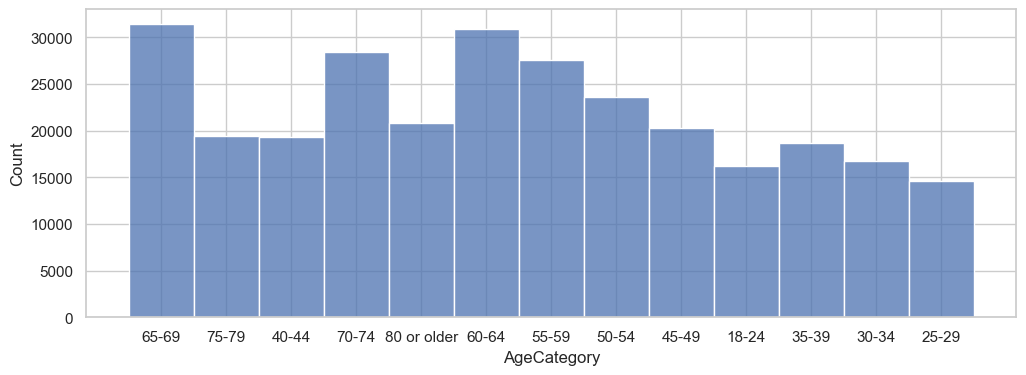

In [82]:
#AgeCategory
print("AgeCategory Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.histplot(x=df1["AgeCategory"])

print("Data is reasonably distributed, no need to clean out.")

Race Cleaning
Total people:  287880
Race
White                             220408
Hispanic                           25160
Black                              21330
Other                               9767
Asian                               6434
American Indian/Alaskan Native      4781
Name: count, dtype: int64
Data is reasonably distributed, no need to clean out.


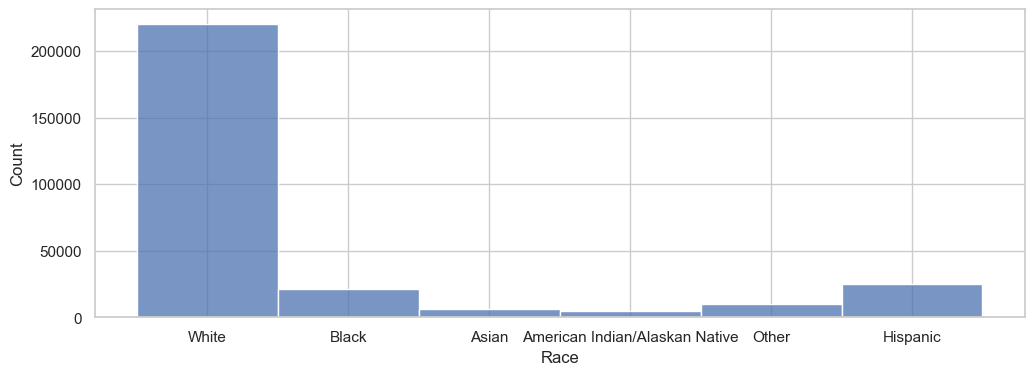

In [83]:
#Race
print("Race Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.histplot(x=df1["Race"])
print("Total people: ",  len(df1))
print(df1["Race"].value_counts())
print("Data is reasonably distributed, no need to clean out.")

General Health Cleaning
Total people:  287880
GenHealth
Very good    103120
Good          85785
Excellent     57241
Fair          31772
Poor           9962
Name: count, dtype: int64
Data is reasonably distributed, no need to clean out.


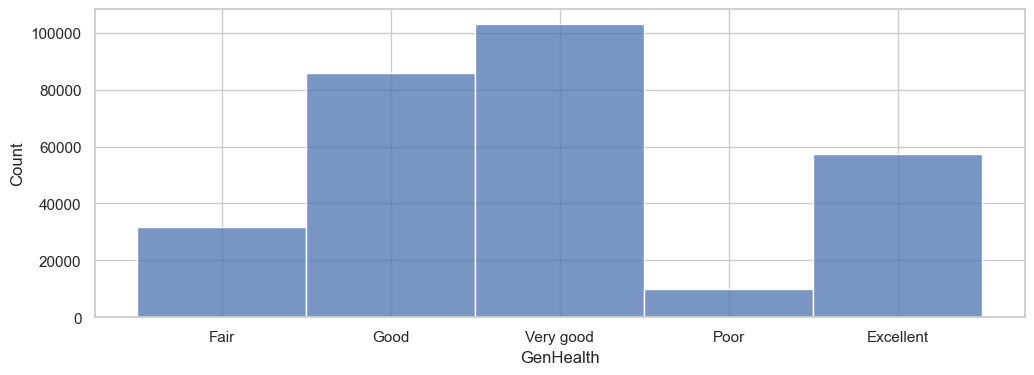

In [84]:
#GenHealth
print("General Health Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.histplot(x=df1["GenHealth"])
print("Total people: ",  len(df1))
print(df1["GenHealth"].value_counts())
print("Data is reasonably distributed, no need to clean out.")

Sleep Time Cleaning
Total people:  287880
SleepTime
7.0     88096
8.0     87300
6.0     60878
5.0     17377
9.0     14197
4.0      6949
10.0     6903
12.0     1974
3.0      1774
2.0       696
1.0       487
11.0      362
14.0      222
16.0      215
15.0      165
18.0       85
13.0       82
20.0       58
24.0       28
17.0       18
22.0        7
19.0        3
23.0        3
21.0        1
Name: count, dtype: int64
Mean of SleepTime:  7.088901625677366
Range of SleepTime: [ 1.0 , 24.0 ]
Data could be cleaned by removing people with sleep time of more than 12 hrs.
As we can see below, people having more than 12 hours of sleep are very less
In real life, that also lies above normal sleeping time for normal human.


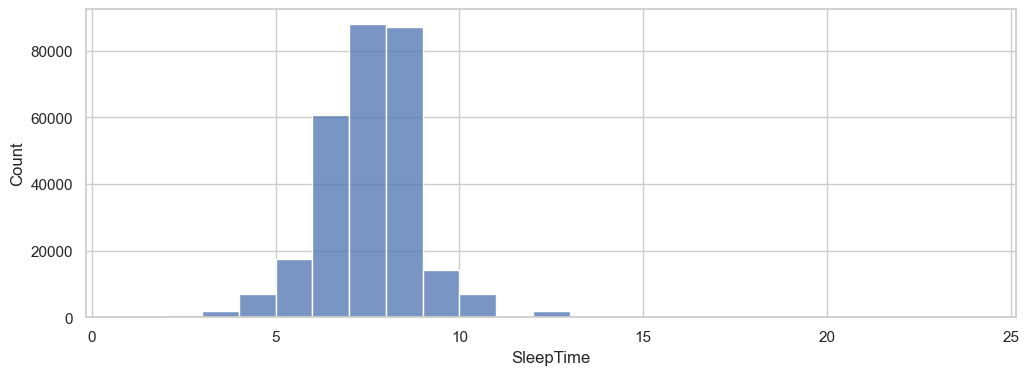

In [85]:
#SleepTime
print("Sleep Time Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.histplot(df1["SleepTime"], binwidth=1)
# sns.boxplot(x=df1["SkinCancer"])
print("Total people: ",  len(df1))
print(df1["SleepTime"].value_counts())
print("Mean of SleepTime: ", df1["SleepTime"].mean())
print("Range of SleepTime: [", df1["SleepTime"].min(), ",", df1["SleepTime"].max(), "]")
print("Data could be cleaned by removing people with sleep time of more than 12 hrs.")
print("As we can see below, people having more than 12 hours of sleep are very less")
print("In real life, that also lies above normal sleeping time for normal human.")

Sleep Time Cleaning
Total people:  285810
SleepTime
7.0     88096
8.0     87300
6.0     60878
5.0     17377
9.0     14197
4.0      6949
10.0     6903
12.0     1974
3.0      1774
11.0      362
Name: count, dtype: int64
Mean of SleepTime:  7.084482698296071
Range of SleepTime: [ 3.0 , 12.0 ]


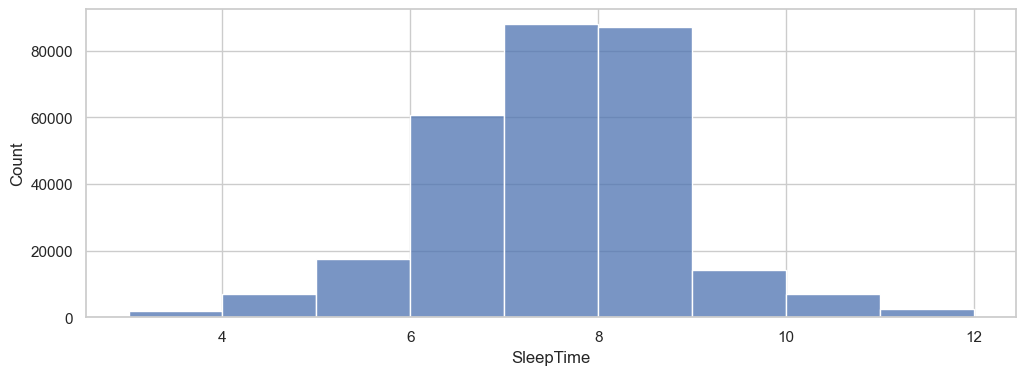

In [86]:
#Clean SleepTime
df1 = df1[(df1["SleepTime"] <= 12.00) & (df1["SleepTime"] >= 3.00)]
print("Sleep Time Cleaning")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.histplot(df1["SleepTime"], binwidth=1)
print("Total people: ",  len(df1))
print(df1["SleepTime"].value_counts())
print("Mean of SleepTime: ", df1["SleepTime"].mean())
print("Range of SleepTime: [", df1["SleepTime"].min(), ",", df1["SleepTime"].max(), "]")

In [87]:
final_length = len(df1)
print("Original Entries: ",original_length)
print("Final Entries: ",final_length)
print("Number of entries removed: ", original_length - final_length)


Original Entries:  319795
Final Entries:  285810
Number of entries removed:  33985


In [88]:
df1.to_csv('../db/heart_data_cleaned.csv', index=False)